# California Housing Dataset - Data Preprocessing & Feature Engineering / Machine Learning Modeling

California Housing Dataset

__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

## Data Import and first Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df[df.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.describe(include="O")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [10]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

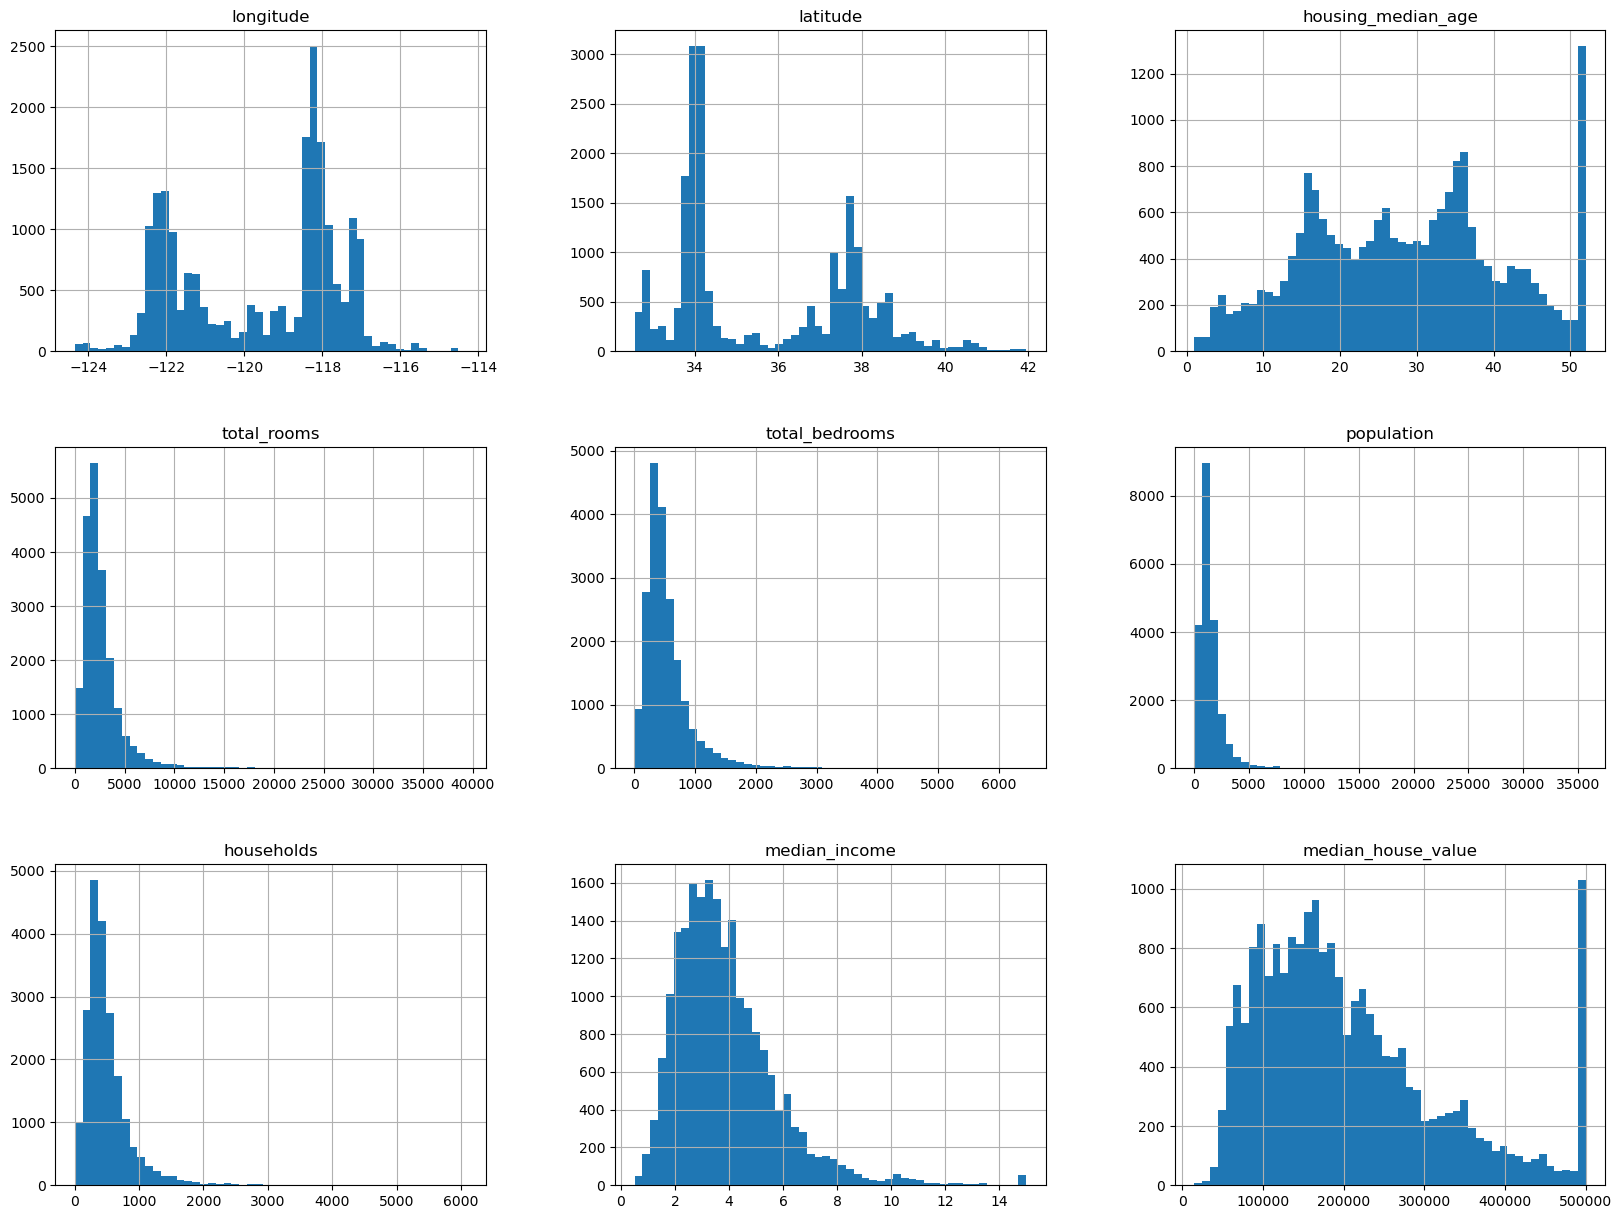

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Data Cleaning and Creating additional Features

Drop rows with missing values

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
df.shape

(20433, 10)

Add additional Feature: "rooms_per_household", "population_per_household", "bedrooms_per_household" 

In [15]:
df["rooms_per_household"] = df.total_rooms.div(df.households)

In [16]:
df["rooms_per_household"].nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [17]:
df["rooms_per_household"].nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [18]:
df.loc[[1914, 1979, 5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,132.533333
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


In [19]:
df["population_per_household"] = df.population.div(df.households)

In [20]:
df["bedrooms_per_household"] = df.total_bedrooms.div(df.households)

In [21]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,1.097062
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.476104
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.333333
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,1.006029
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,1.048889
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,1.099631
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,34.066667


## Which Factors influence House Prices?

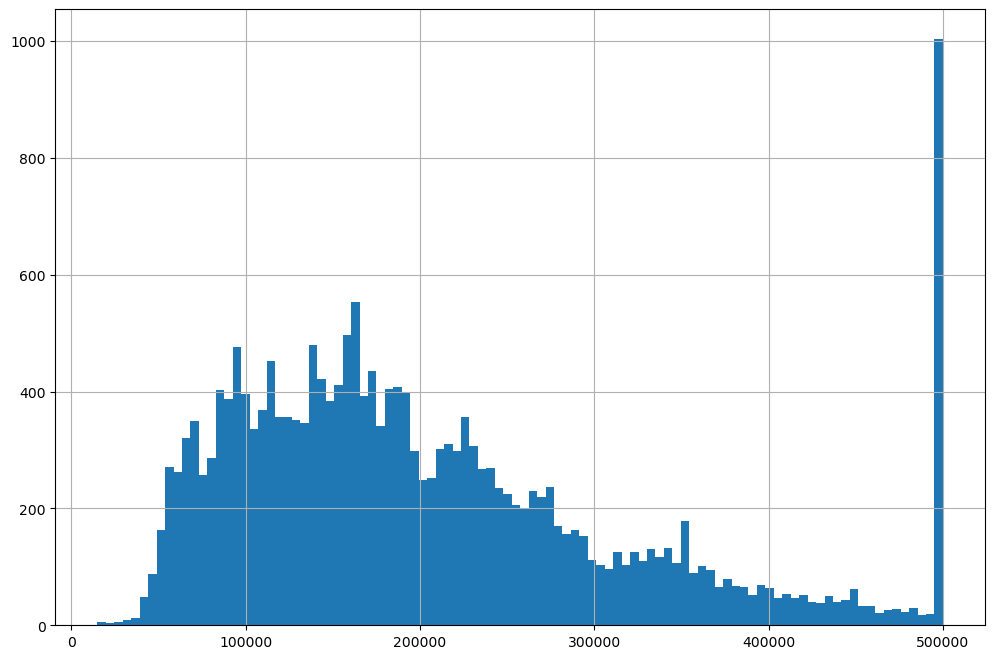

In [22]:
df.median_house_value.hist(bins=100, figsize=(12, 8))
plt.show()

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

In [23]:
df.corr().median_house_value.sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
bedrooms_per_household     -0.046739
latitude                   -0.144638
Name: median_house_value, dtype: float64

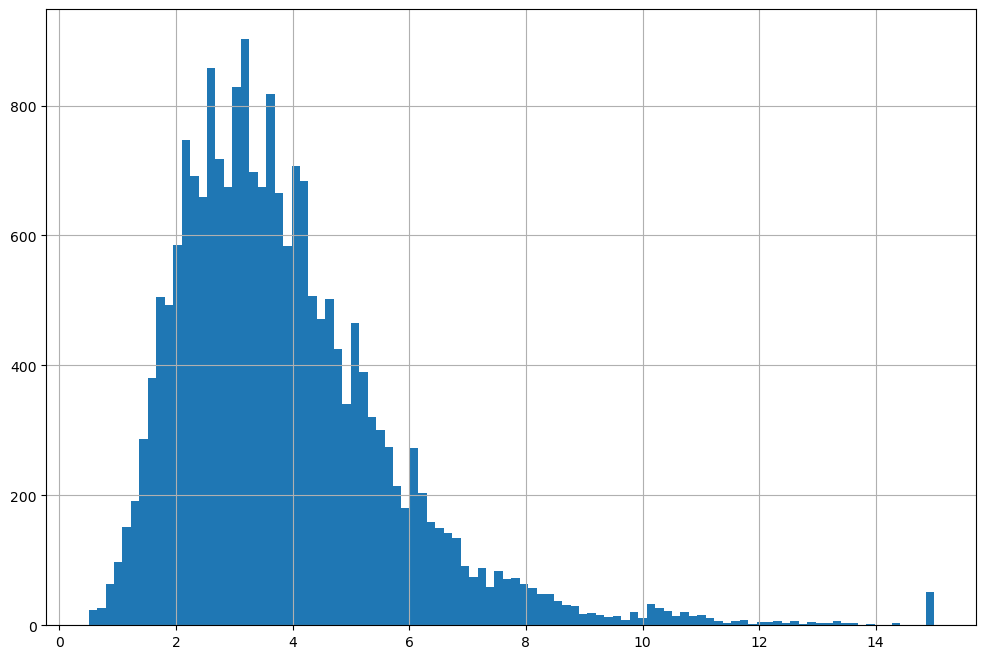

In [24]:
df.median_income.hist(bins=100, figsize=(12, 8))
plt.show()

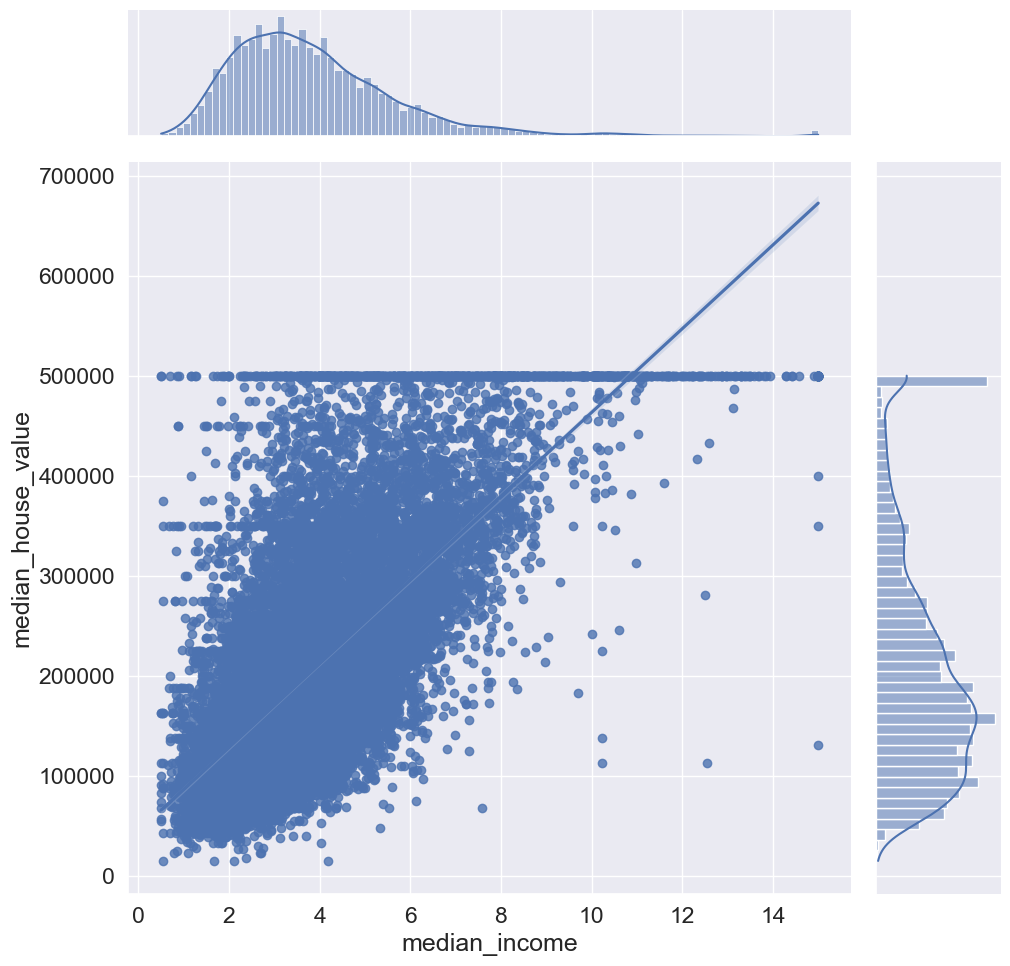

In [25]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='reg', height=10)
plt.show()

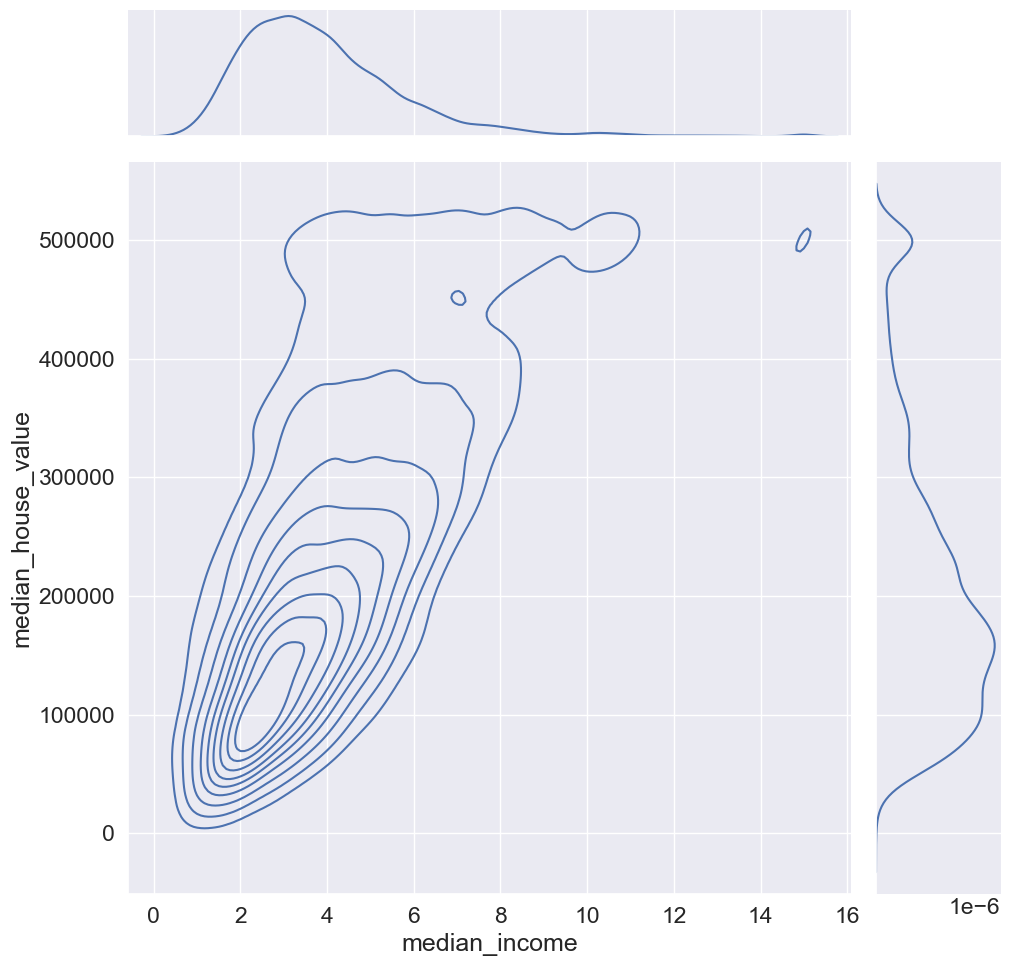

In [26]:
sns.set(font_scale=1.5)
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='kde', height=10)
plt.show()

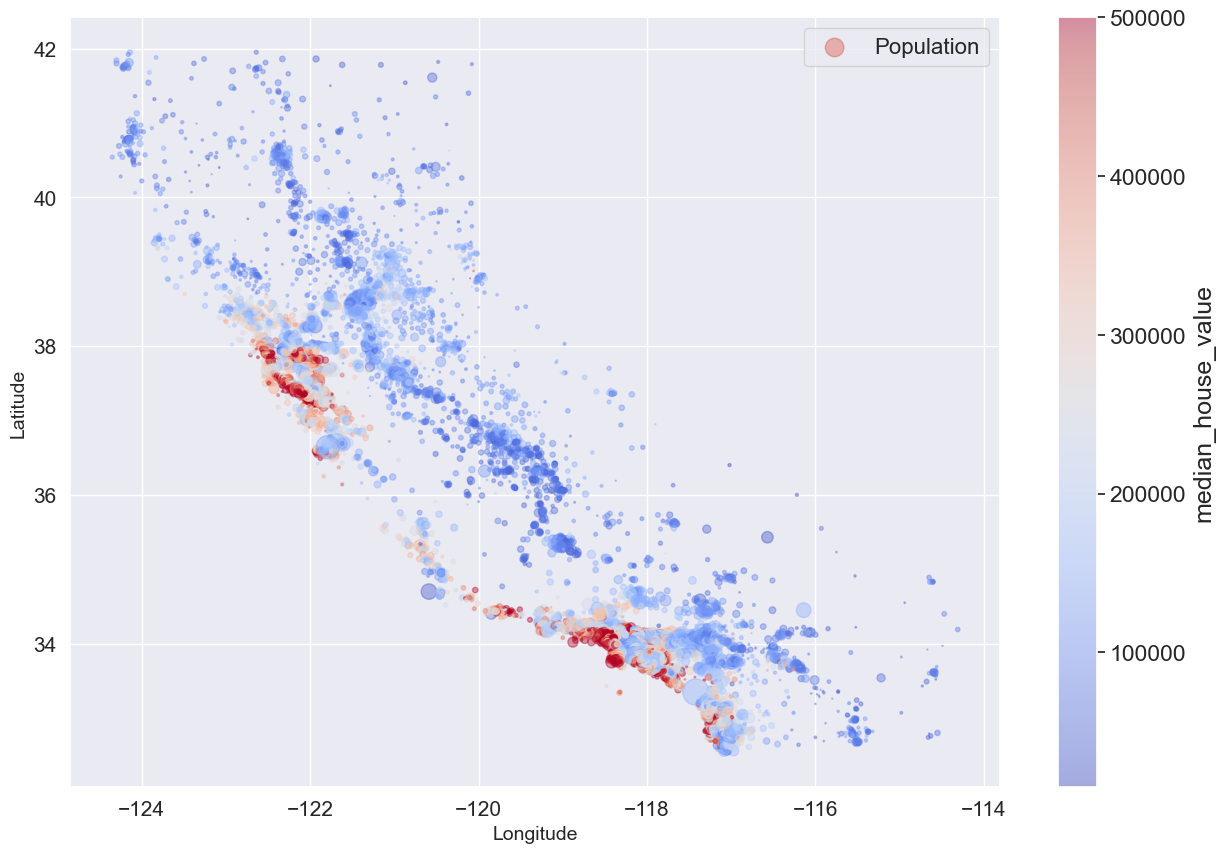

In [27]:
df.plot(kind="scatter", x="longitude", y="latitude", s=df.population/100, figsize= (15,10), 
        c="median_house_value", cmap="coolwarm", label="Population", colorbar=True, alpha=0.4, fontsize=15, sharex=False)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [28]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")

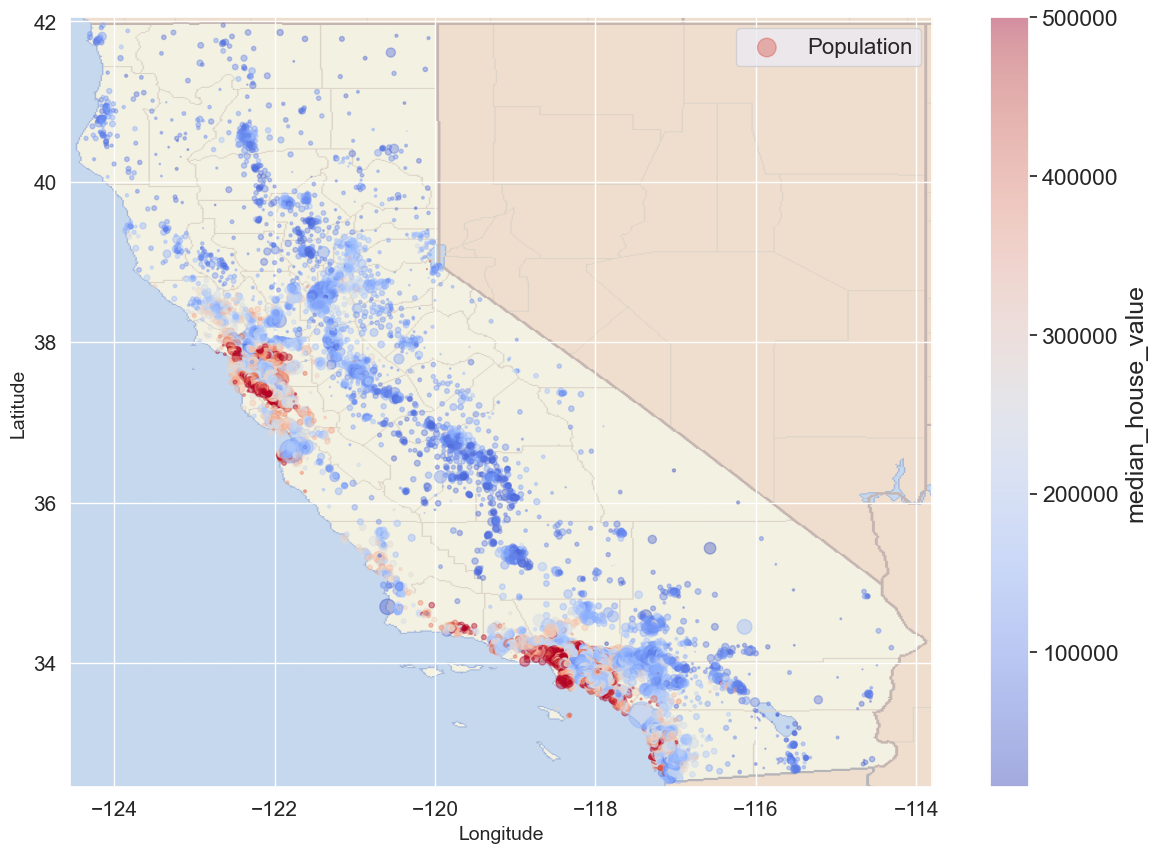

In [29]:
df.plot(kind="scatter", x="longitude", y="latitude", s=df.population/100, figsize= (15,10), 
        c="median_house_value", cmap="coolwarm", label="Population", colorbar=True, alpha=0.4, 
        fontsize=15, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [30]:
prox=df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [31]:
df_loc = df[df.ocean_proximity == prox[3]].copy()

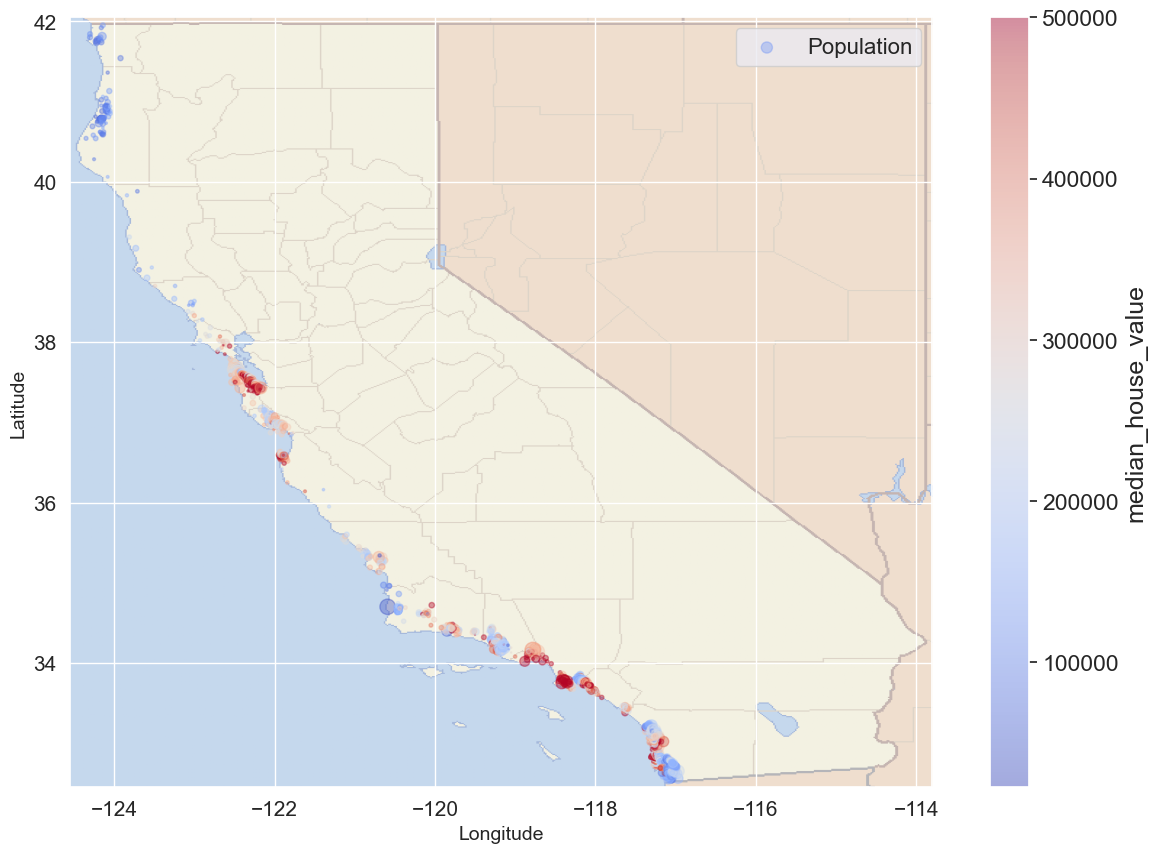

In [32]:
df_loc.plot(kind="scatter", x="longitude", y="latitude", s=df_loc.population/100, figsize= (15,10), 
        c="median_house_value", cmap="coolwarm", label="Population", colorbar=True, alpha=0.4, 
        fontsize=15, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [33]:
df_loc = df[df.ocean_proximity == prox[2]].copy()

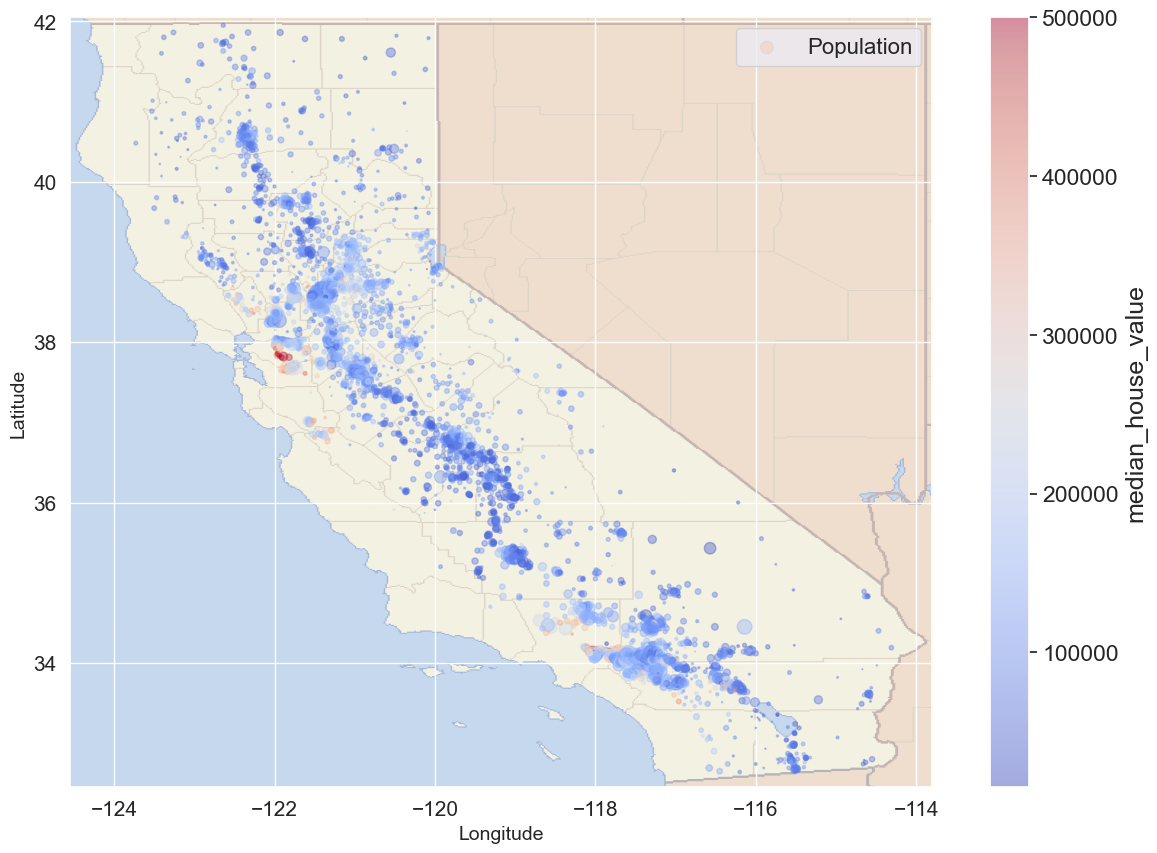

In [34]:
df_loc.plot(kind="scatter", x="longitude", y="latitude", s=df_loc.population/100, figsize= (15,10), 
        c="median_house_value", cmap="coolwarm", label="Population", colorbar=True, alpha=0.4, 
        fontsize=15, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

In [35]:
df["income_cat"] = pd.qcut(df.median_income, q=[0, 0.25, 0.50, 0.75, 0.95, 1], 
                     labels=["Low", "Below_Average", "Above_Average", "High", "Very_High"])

In [36]:
df.income_cat

0            Very_High
1            Very_High
2                 High
3                 High
4        Above_Average
             ...      
20635              Low
20636              Low
20637              Low
20638              Low
20639              Low
Name: income_cat, Length: 20433, dtype: category
Categories (5, object): ['Low' < 'Below_Average' < 'Above_Average' < 'High' < 'Very_High']

In [37]:
df.income_cat.value_counts(normalize=True)

Low              0.250037
Above_Average    0.250037
Below_Average    0.249988
High             0.199922
Very_High        0.050017
Name: income_cat, dtype: float64

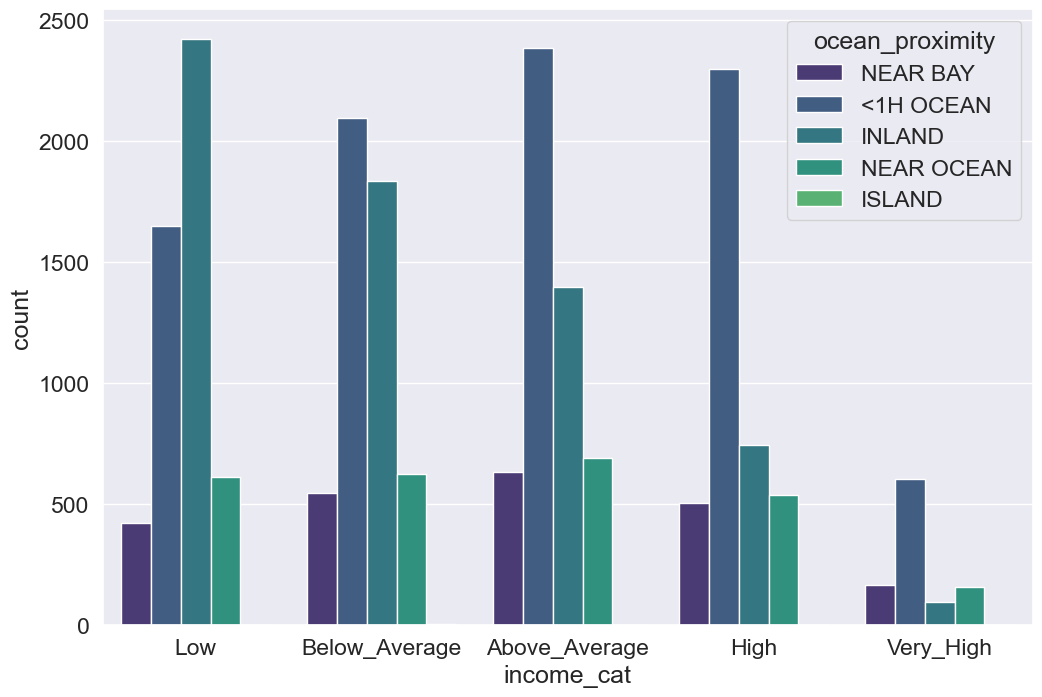

In [38]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette="viridis")
sns.countplot(data=df, x="income_cat", hue="ocean_proximity")
plt.show()

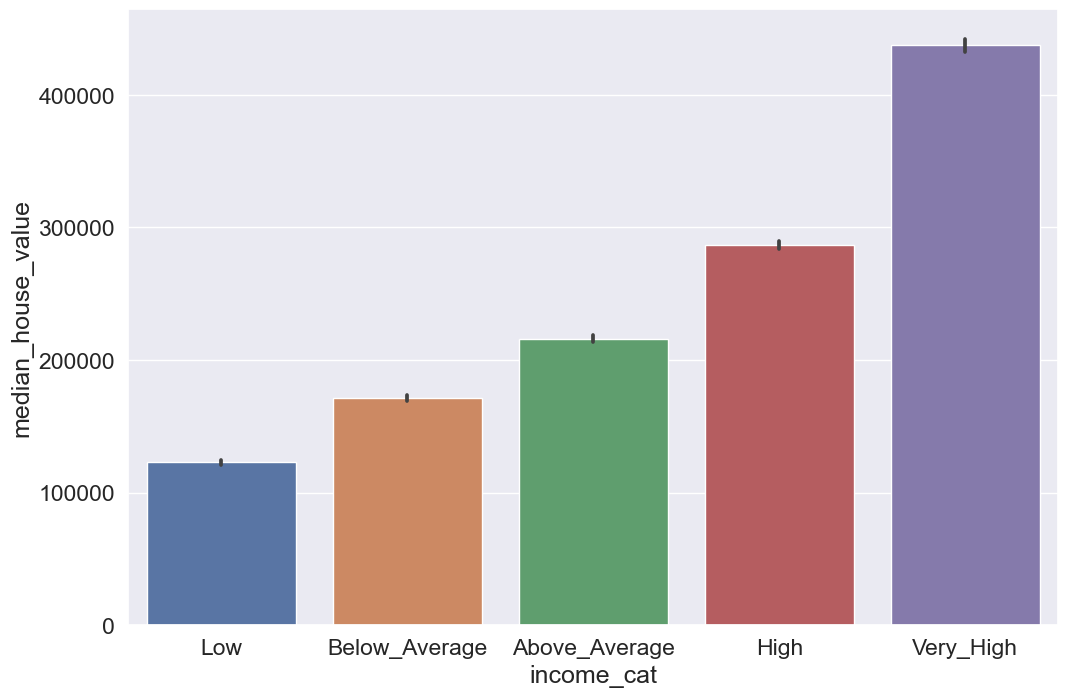

In [39]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x="income_cat", y="median_house_value", dodge=True)
plt.show()

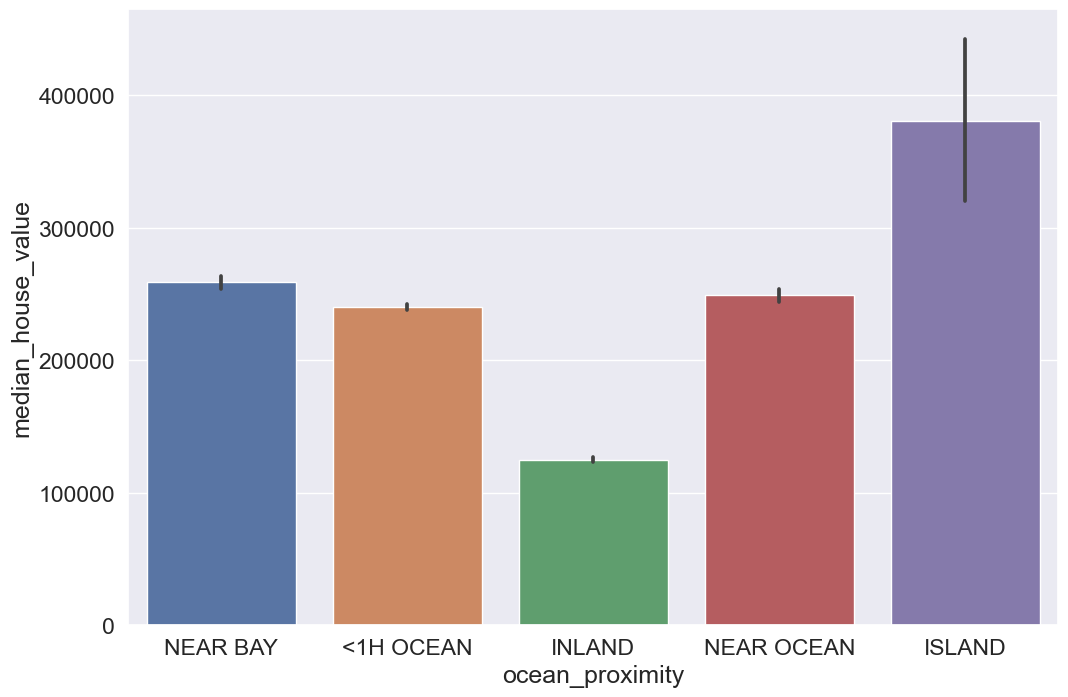

In [40]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data=df, x="ocean_proximity", y="median_house_value", dodge=True)
plt.show()

In [41]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns="ISLAND")
matrix

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
Low,161337.076923,84820.626650,155122.052133,148027.826514
Below_Average,197236.013829,115124.088283,220196.177656,208665.190096
Above_Average,232278.358759,147846.891351,261965.251582,255293.813584
High,292208.766217,208095.566622,322566.033663,337446.227778
Very_High,439784.235489,347571.736842,451015.078788,468739.723270


In [42]:
matrix = matrix.astype("int")

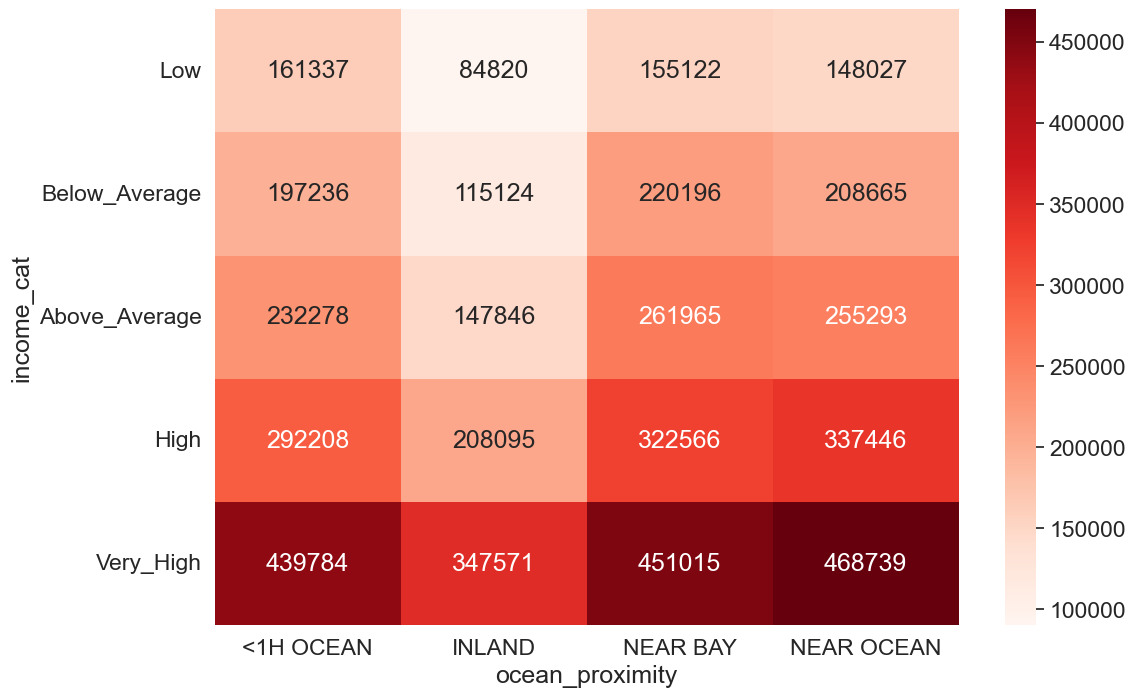

In [43]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.heatmap(data=matrix, cmap="Reds", annot=True, fmt="d", vmin=90000, vmax=470000)
plt.show()

## Machine Learning Modelling - Predicting House Values

#### Separate labels and fetatures. Standarize numerical features. Transform categorical column.

In [44]:
labels = df.median_house_value.copy()
labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [45]:
features= df.drop(columns='median_house_value').copy()
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,1.023810,Very_High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.971880,Very_High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,1.073446,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,1.073059,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,1.081081,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,1.133333,Low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,1.315789,Low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,1.120092,Low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,1.171920,Low


In [46]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20433 non-null  float64 
 1   latitude                  20433 non-null  float64 
 2   housing_median_age        20433 non-null  float64 
 3   total_rooms               20433 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20433 non-null  float64 
 6   households                20433 non-null  float64 
 7   median_income             20433 non-null  float64 
 8   ocean_proximity           20433 non-null  object  
 9   rooms_per_household       20433 non-null  float64 
 10  population_per_household  20433 non-null  float64 
 11  bedrooms_per_household    20433 non-null  float64 
 12  income_cat                20433 non-null  category
dtypes: category(1), float64(11), object(1)
memory 

In [47]:
from scipy.stats import stats

In [48]:
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.625395,-0.049433,-0.153863
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.324942,-0.092134,-0.262936
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.150594,-0.025797,-0.049604
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.155467,-0.050162,-0.050417
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.342549,-0.085272,-0.033568
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-0.155420,-0.048949,0.076185
20636,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,0.274959,0.004912,0.459421
20637,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.090943,-0.071460,0.048373
20638,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-0.041013,-0.090853,0.157233


In [49]:
pd.options.display.float_format = '{:.2f}'.format

In [50]:
feat1.agg(["mean", "std"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household
mean,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [51]:
features.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [52]:
features.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [53]:
dummies = pd.get_dummies(features.ocean_proximity)

In [54]:
features = pd.concat([feat1, dummies, df.income_cat], axis=1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.35,0.63,-0.05,-0.15,0,0,0,1,0,Very_High
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.32,-0.09,-0.26,0,0,0,1,0,Very_High
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.15,-0.03,-0.05,0,0,0,1,0,High
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.16,-0.05,-0.05,0,0,0,1,0,High
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.34,-0.09,-0.03,0,0,0,1,0,Above_Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.16,-0.05,0.08,0,1,0,0,0,Low
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.27,0.00,0.46,0,1,0,0,0,Low
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.09,-0.07,0.05,0,1,0,0,0,Low
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.16,0,1,0,0,0,Low


#### Split into Train and Test Set

In [55]:
test_size= 0.2

In [56]:
X_test = features.sample(frac= test_size, random_state=123)

In [57]:
X_test.income_cat.value_counts(normalize=True)

Above_Average   0.25
Below_Average   0.25
Low             0.25
High            0.20
Very_High       0.05
Name: income_cat, dtype: float64

In [58]:
features.income_cat.value_counts(normalize=True)

Low             0.25
Above_Average   0.25
Below_Average   0.25
High            0.20
Very_High       0.05
Name: income_cat, dtype: float64

In [59]:
X_train = features.loc[~features.index.isin(X_test.index)].copy()

In [60]:
X_train.income_cat.value_counts(normalize=True)

Low             0.25
Below_Average   0.25
Above_Average   0.25
High            0.20
Very_High       0.05
Name: income_cat, dtype: float64

In [61]:
# Shuffle x_train
X_train = X_train.sample(frac=1, random_state=123)

In [62]:
X_train.drop(columns=["income_cat"], inplace=True)

In [63]:
X_test.drop(columns=["income_cat"], inplace=True)

In [64]:
y_train = labels.loc[X_train.index]
y_test = labels.loc[X_test.index]

### Train ML Model - Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
forest_reg = RandomForestRegressor(random_state=42, n_estimators = 500, 
                                   max_features="sqrt", max_depth=75, min_samples_split=2)

In [67]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', n_estimators=500,
                      random_state=42)

In [68]:
#Verify how well model fits to training set before applying to test set. If fit is to good, it may indicate overffiting
#Coefficient of determination: 0 = no fit, ! = perfect fit
forest_reg.score(X_train, y_train)

0.9759780869513852

In [69]:
#Mean squered error: 0 = perfect fit
from sklearn.metrics import mean_squared_error

In [70]:
pred = forest_reg.predict(X_train)

In [71]:
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

17974.726244399088

### Evaluation the Model in the Test Set

In [72]:
forest_reg.score(X_test, y_test)

0.82506464110228

In [73]:
pred = forest_reg.predict(X_test)

In [74]:
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47360.24736243179

In [75]:
comp = pd.DataFrame(data ={"True_V": y_test, "Pred": pred})
comp

,True_V,Pred
14354,101800.00,225016.20
12908,213000.00,126180.60
19545,58800.00,69888.00
12188,111300.00,183140.02
14786,174100.00,157747.40
...,...,...
10262,272200.00,299423.20
3614,175900.00,174342.60
19296,215900.00,224855.21
5826,326100.00,323898.22


In [76]:
ae = comp.True_V.sub(comp.Pred).abs()
ae

14354   123216.20
12908    86819.40
19545    11088.00
12188    71840.02
14786    16352.60
           ...   
10262    27223.20
3614      1557.40
19296     8955.21
5826      2201.78
15383    29331.00
Length: 4087, dtype: float64

In [77]:
mae = ae.mean()
mae

31664.62784781024

### Feature Importance

In [78]:
forest_reg.feature_importances_

array([9.01848774e-02, 8.38850834e-02, 4.14095204e-02, 2.62481793e-02,
       2.04767512e-02, 2.39205750e-02, 2.01315999e-02, 3.08683712e-01,
       9.02288560e-02, 9.70017497e-02, 2.75894830e-02, 1.97577794e-02,
       1.35222281e-01, 2.11614565e-04, 6.32327197e-03, 8.72466641e-03])

In [79]:
feature_imp = pd.Series(data=forest_reg.feature_importances_, index=X_train.columns)

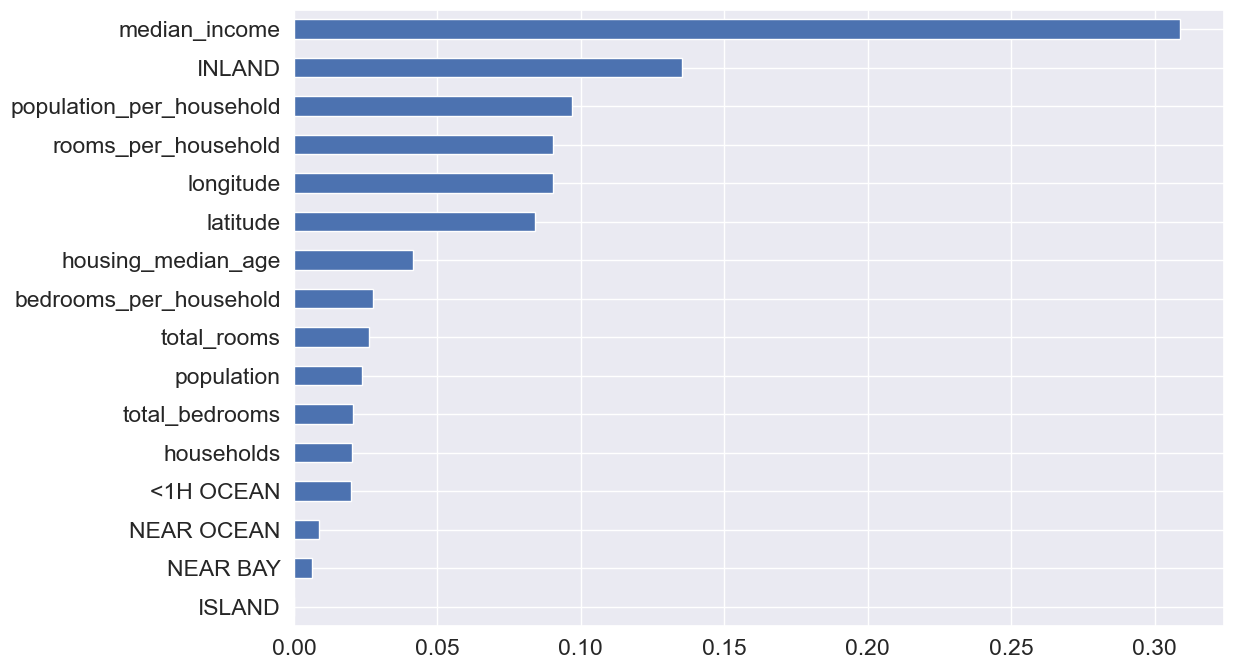

In [80]:
feature_imp.sort_values().plot(kind='barh', figsize=(12,8))
plt.show()